<a href="https://colab.research.google.com/github/jsdysw/dive-into-deep-learning/blob/master/linear_softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torch.utils import data
import matplotlib.pyplot as plt
import numpy

# FashionMNIST dataset

In [93]:
# `ToTensor` converts the image data from PIL type to 32-bit floating point
# tensors. It divides all numbers by 255 so that all pixel values are between
# 0 and 1
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

In [94]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [95]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

label :  9


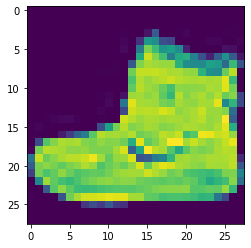

label :  0


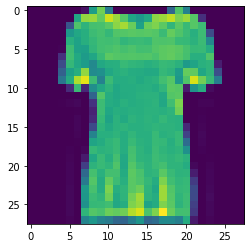

In [96]:
print("label : ", mnist_train[0][1])
plt.imshow(mnist_train[0][0].numpy()[0])
plt.show()

print("label : ", mnist_train[10][1])
plt.imshow(mnist_train[10][0].numpy()[0])
plt.show()

# Reading a minibatch

In [97]:
batch_size = 256
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=4)
test_iter = data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [98]:
for X, y in train_iter:
   print(X.shape, X.dtype, y.shape, y.dtype)
   break

torch.Size([256, 1, 28, 28]) torch.float32 torch.Size([256]) torch.int64


# Initialize Model Parameters

In [99]:
# PyTorch does not implicitly reshape the inputs. Thus we define the flatten
# layer to reshape the inputs before the linear layer in our network
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
def init_weights(m):
    print(m)
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, mean=0.0, std=0.01)
        # nn.init.constant_(m.weight, 1.0)
        # or
        # m.weight.data.normal_(0,0.01)
        # m.weight.data.fill_(1.0)
        print(m.weight)

net.apply(init_weights);

Flatten(start_dim=1, end_dim=-1)
Linear(in_features=784, out_features=10, bias=True)
Parameter containing:
tensor([[ 0.0075, -0.0024,  0.0049,  ..., -0.0095, -0.0115,  0.0022],
        [-0.0034, -0.0025, -0.0141,  ...,  0.0074,  0.0060, -0.0038],
        [-0.0104, -0.0040, -0.0062,  ...,  0.0012, -0.0057, -0.0106],
        ...,
        [ 0.0132, -0.0058, -0.0106,  ...,  0.0152,  0.0031, -0.0122],
        [ 0.0044,  0.0010, -0.0029,  ...,  0.0067,  0.0103,  0.0027],
        [-0.0104,  0.0067, -0.0051,  ...,  0.0039, -0.0068, -0.0137]],
       requires_grad=True)
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


# Defining Loss

In [100]:
# pass the logits and compute the softmax and its log all at once inside 
# the cross-entropy loss function
loss = nn.CrossEntropyLoss(reduction='none')

# Defining Optimizer

In [101]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

# Train

In [102]:
def accuracy(y_hat, y):  
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [103]:
num_epochs = 10

test_accuracy = []
train_loss = []
train_accuracy = []

for epoch in range(num_epochs):    
    train_loss_sum = 0.0
    train_acc_sum = 0
    train_y_num = 0

    for X, y in train_iter:
    # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        # Using PyTorch in-built optimizer & loss criterion
        trainer.zero_grad()
        l.mean().backward()
        trainer.step()

        train_loss_sum += float(l.sum())
        train_acc_sum += accuracy(y_hat, y)
        train_y_num += y.numel()

    # evaluate train accuracy, loss
    train_loss.append(train_loss_sum / train_y_num)
    train_accuracy.append(train_acc_sum / train_y_num)

    # evaluate test accuracy
    net.eval()  # Set the model to evaluation mode
    test_acc = 0.0
    y_num = 0.0
    with torch.no_grad():
        for X, y in test_iter:
          test_acc += accuracy(net(X), y)
          y_num += y.numel()
    test_accuracy.append(test_acc / y_num)

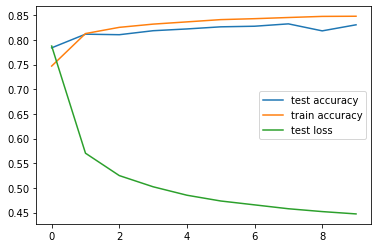

In [106]:
plt.plot(test_accuracy, label='test accuracy')
plt.plot(train_accuracy, label='train accuracy')
plt.plot(train_loss, label='test loss')
plt.legend()

# Prediction

pred tensor(9) true tensor(9)


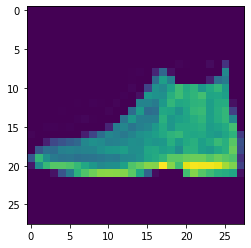

pred tensor(2) true tensor(2)


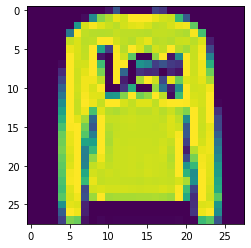

pred tensor(5) true tensor(7)


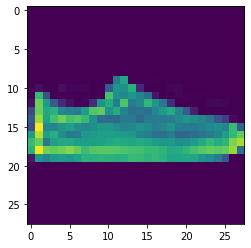

In [114]:
for X, y in test_iter:
    break

prediction = net(X).argmax(axis=1)[0]
trues = y[0]
print("pred", prediction, "true", trues)
plt.imshow(X[0].numpy()[0])
plt.show()

prediction = net(X).argmax(axis=1)[1]
trues = y[1]
print("pred", prediction, "true", trues)
plt.imshow(X[1].numpy()[0])
plt.show()

prediction = net(X).argmax(axis=1)[12]
trues = y[12]
print("pred", prediction, "true", trues)
plt.imshow(X[12].numpy()[0])
plt.show()